## Task 1: Predict Employee Attrition
Objective: Build a classification model to predict whether an employee will leave a company
based on HR data and derive actionable retention strategies.
● Dataset: IBM HR Analytics Dataset
● Steps:
1. Perform Exploratory Data Analysis (EDA) to identify key factors influencing
attrition.
2. Train classification models such as Random Forest or Logistic Regression.
3. Use SHAP or LIME to explain model predictions and interpret results.
4. Provide actionable insights to reduce attrition.
● Outcome: A classification model for employee attrition with
explainable insights for HR retention strategies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import warnings
warnings.filterwarnings("ignore")

# 🧾 2. Load Dataset

In [2]:
file_path = "C:/Users/PMLS/Desktop/All desktop things/DS internship/TASK 2/Hr.csv"
df = pd.read_csv(file_path)

# 📊 3. Basic Inspection

In [3]:
print("🔹 Shape of Dataset:", df.shape)
print("\n🔹 Columns:\n", df.columns.tolist())
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Last 5 Rows:\n", df.tail())


🔹 Shape of Dataset: (1470, 35)

🔹 Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

🔹 Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Employ

# 🎯 4. Target Variable Distribution

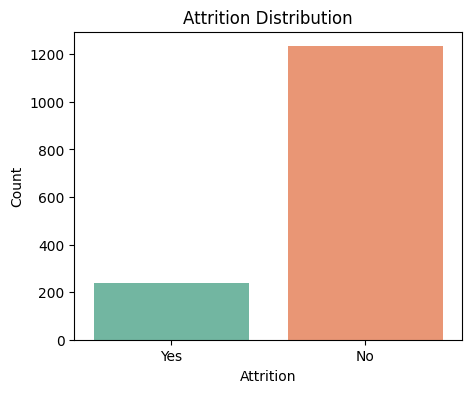

In [4]:

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# 📌 5. Categorical Features vs Attrition

In [5]:
print("🔍 Unique Attrition values BEFORE cleanup:", df['Attrition'].unique())

🔍 Unique Attrition values BEFORE cleanup: ['Yes' 'No']


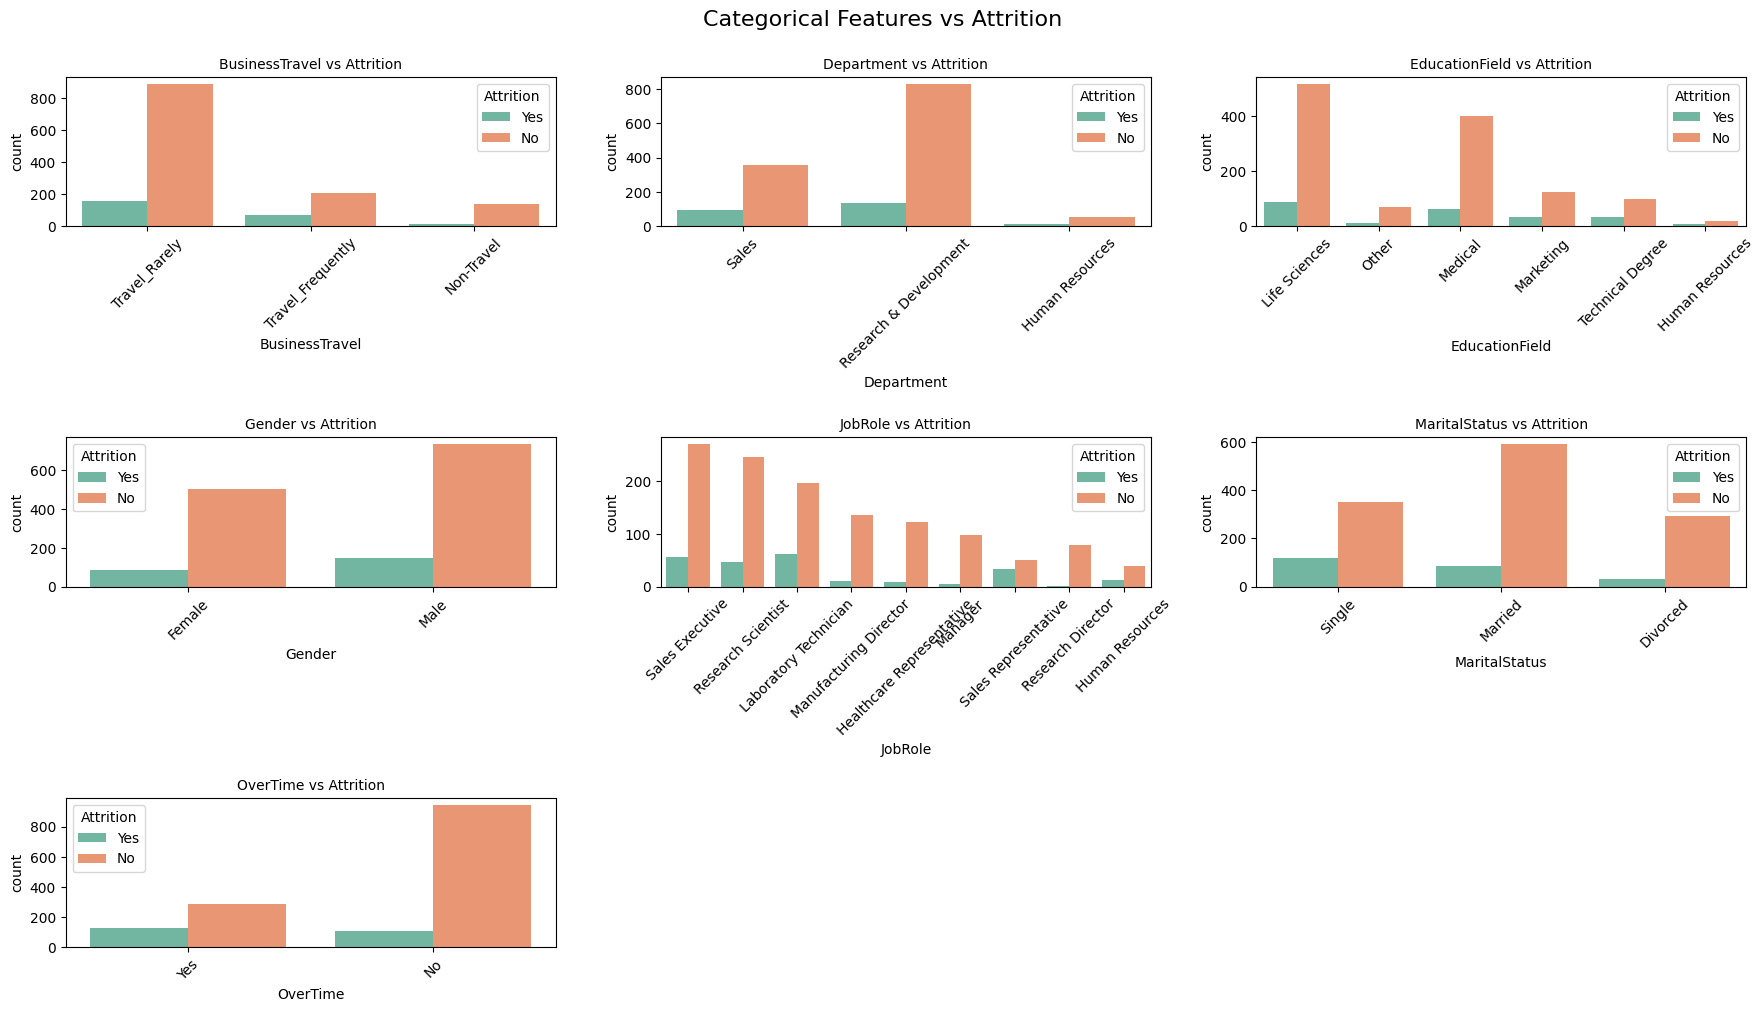

In [6]:

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                    'JobRole', 'MaritalStatus', 'OverTime']

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set2')
    plt.title(f'{col} vs Attrition', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=2.0)

plt.suptitle("Categorical Features vs Attrition", fontsize=16, y=1.02)
plt.show()


In [7]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = len(le.classes_)

In [8]:
# 3. Drop unnecessary columns (if exist)
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# 🎯 6. Basic Preprocessing

In [9]:
# 4. Label Encode all categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 🧹 7. Feature Scaling

In [10]:
# 5. Split into X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [11]:
# 6. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# ✅ Convert scaled array back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# 🔀 8. Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 🤖 9. Model Training

## Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("\n📘 Logistic Regression Report")
print(classification_report(y_test, lr_preds))



📘 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



## Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\n🌲 Random Forest Report")
print(classification_report(y_test, rf_preds))


🌲 Random Forest Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



### ✅ Accuracy Comparison

In [27]:

# ✅ Accuracy Comparison
print(f"Accuracy - Logistic Regression: {accuracy_score(y_test, lr_preds):.2f}")
print(f"Accuracy - Random Forest: {accuracy_score(y_test, rf_preds):.2f}")

Accuracy - Logistic Regression: 0.87
Accuracy - Random Forest: 0.84


# 🔍 7. SHAP Explainability (Random Forest)

In [34]:
# Generate SHAP values for the Random Forest model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

<Figure size 1000x1500 with 0 Axes>

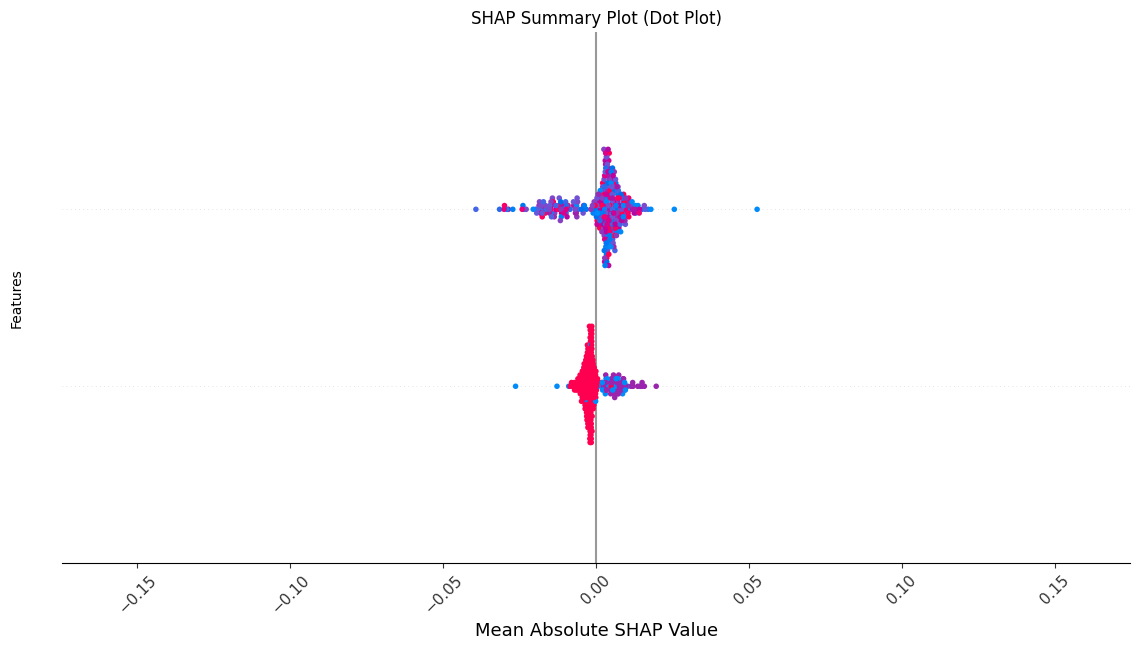

In [50]:
# Detailed SHAP summary plot
plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="dot", show=False)


plt.title("SHAP Summary Plot (Dot Plot)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# The graph explanation in the previous cell (SHAP summary plot):

The SHAP summary plot provides insights into the feature importance and their impact on the model's predictions. Here's what it explains:

1. **Feature Importance**:
    - The features are listed on the y-axis in descending order of their importance. The most important features (those that contribute the most to the model's predictions) are at the top.

2. **SHAP Values**:
    - The x-axis represents the SHAP values, which indicate the impact of each feature on the model's output. Positive SHAP values push the prediction towards one class (e.g., "Attrition = 1"), while negative SHAP values push it towards the other class (e.g., "Attrition = 0").

3. **Color Coding**:
    - Each dot represents a data point, and the color indicates the feature value for that data point. Red dots represent high feature values, while blue dots represent low feature values.

4. **Distribution**:
    - The spread of dots along the x-axis shows the variability in the feature's impact across different data points. A wider spread indicates that the feature has a varying impact on predictions.

In summary, the SHAP summary plot helps identify which features are most influential in the model's predictions and how their values affect the outcome. This is crucial for understanding and interpreting the model's behavior.